In [2]:
from LocalABC import gp
from LocalABC import abc
from LocalABC import kernels as k # imports predefined lengthscales and kernel functions
from LocalABC import mesh # imports predefined get mesh functions
from LocalABC import plot

import matplotlib.pyplot as plt 
import scipy
import numpy as np

plt.rcParams['figure.figsize'] = [12, 6]

# LocalABC example use:
We first define our synthetic function.

In [3]:
def logit(x,unit):
    return(1/(1+np.exp(-80*(np.dot(x,unit)))))

def param_gen(D):
    params = []
    for i in range(D):
        c = np.random.uniform(0.1,0.9,1)[0]
        max_r = 0.15
        r = scipy.stats.beta.rvs(5,2)*max_r
        height = np.exp(1)*np.random.uniform(0.5,1.5)
        freq = np.random.uniform(0,5)
        pm = np.random.randint(0,2,1)[0]
        params.append([c,r,height,freq,pm])
    return(params)

def base(x,params):
    c,r,height,freq,pm = params
    cond_list = [np.abs(x-c)>r,np.abs(x-c)<=r]
    choice_list = [-1,-1 + height*np.exp(-1/(1-np.abs(1/r*(x-c))**2)+np.cos(freq*np.pi/r*np.abs(x-c)))]
    return(np.select(cond_list,choice_list) + (0.5*(-1)**pm + 1 - (-1)**pm*logit(x - c,1)))    

param = param_gen(1)[0] # need to flatten parameter list for 1D test functions
func = lambda x: base(x,param) # define our function

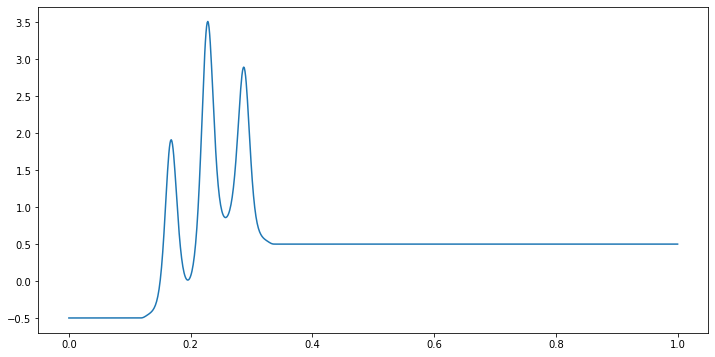

[0.22759678527182745, 0.11533866773461993, 3.5085030821818934, 3.768874399623247, 1]


In [4]:
plt.plot(np.linspace(0,1,1000),func(np.linspace(0,1,1000)))
plt.show()
print(param)

Then we define the elements of our Gaussian Process object. The beta are the kernel hyperparameters. It was found that these initial values ensure the optimisation step in the ABC function will terminate successfully.

In [5]:
X = np.around(np.array(np.meshgrid(np.linspace(0,1,11), indexing='ij')).reshape(1,-1).T,1)  #Initial grid of points
Y = func(X).flatten()
beta = np.array([-0.33, -1, -0.9, -1, -1.2, -2, -2.6, -2, -1.2, -1, -1.1, -1])
print(X)

[[0. ]
 [0.1]
 [0.2]
 [0.3]
 [0.4]
 [0.5]
 [0.6]
 [0.7]
 [0.8]
 [0.9]
 [1. ]]


We define our Gaussian Process object using an imported Kernel object. Input is:

`` GaussianProcess(Kernel object, Kernel hyperparameters, X, Y) ``


In [6]:
GP = gp.GaussianProcess(k.K_lin_mat1_10,beta,X,Y) # Define Gaussian process
GP.name = "Gaussian Process with piecewise linear lengthscale" # The GP name is only used for plotting

No threshold given, optimising beta at each step.
Output directory out already exists 
Saving output to out
Step  1  of  31
beta:  [-0.42281552 -1.71063376 -1.87789755 -1.22963034 -3.06185094 -1.19372269
 -1.33248093 -1.33320636 -1.32885342 -1.325756   -1.31260781 -1.24123368] 
Message:  Optimization terminated successfully. 
Value:  17.24273577830335 
Success:  True 
Log-Likelihood:  -5.410488827453091


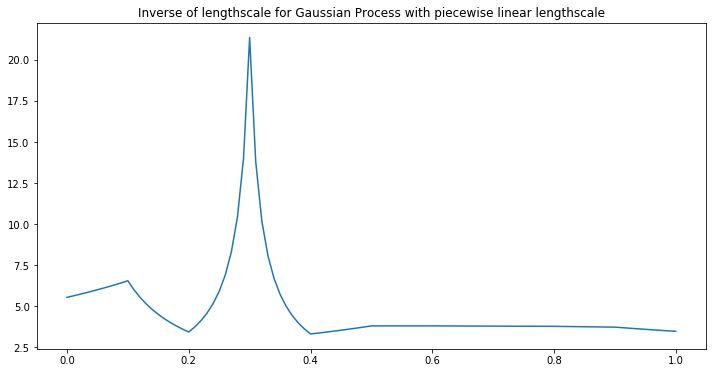

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


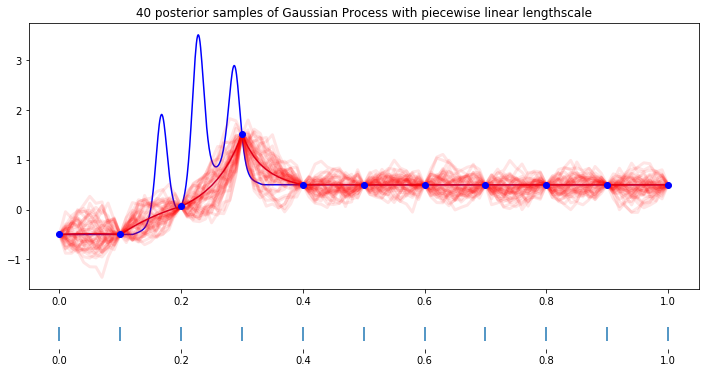

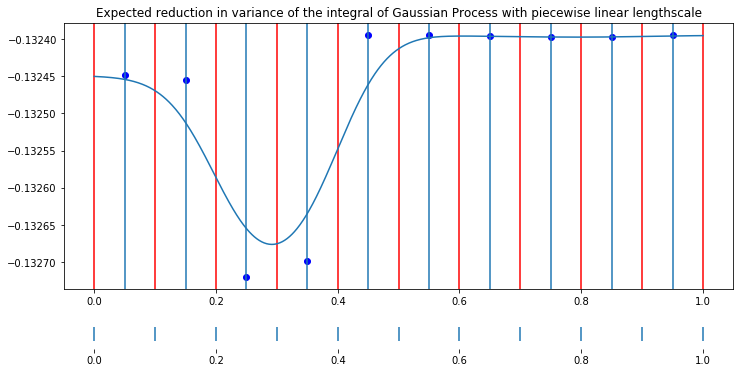

0.25
0.9947220055459536
Step  2  of  31
beta:  [-0.36804682 -1.71128252 -1.82898534 -1.7677886  -2.58625706 -1.16812266
 -1.32665492 -1.32557693 -1.32148898 -1.31925003 -1.30590266 -1.23050684] 
Message:  Optimization terminated successfully. 
Value:  18.008232875249305 
Success:  True 
Log-Likelihood:  -6.286553367250974


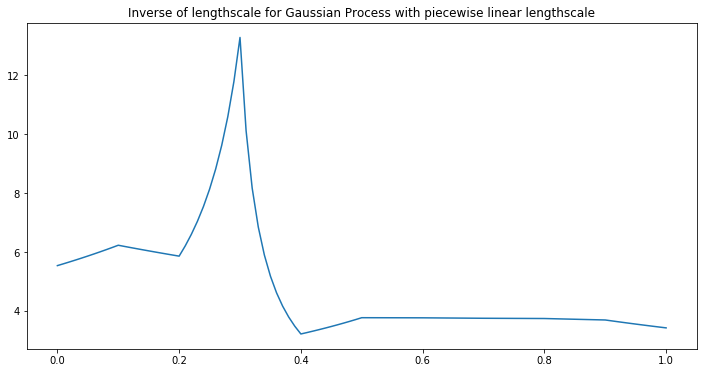

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


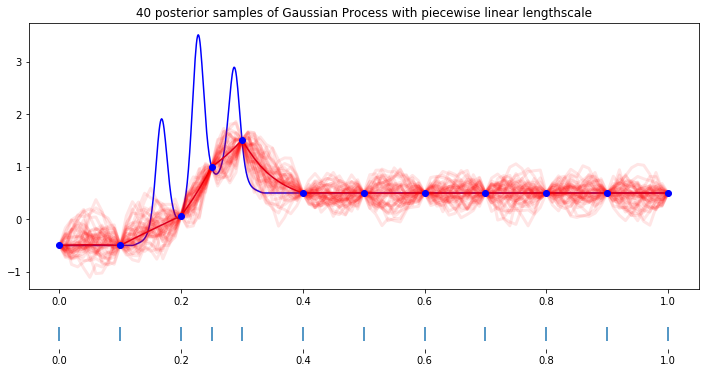

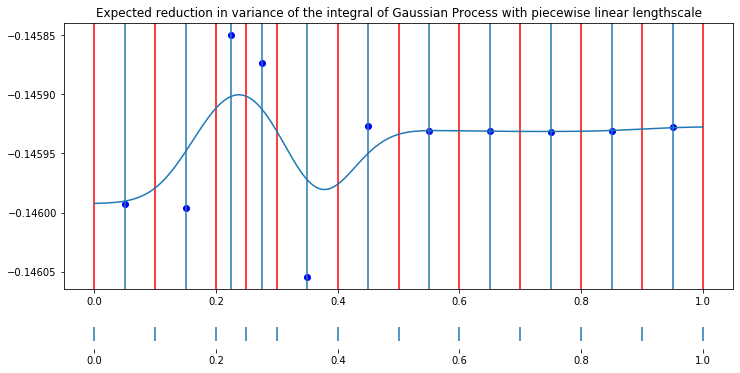

0.35
0.49994412050491466
Step  3  of  31
beta:  [-0.39410892 -1.75676249 -1.85770739 -1.81470177 -2.73572122 -0.93768325
 -1.29715276 -1.32160988 -1.32700369 -1.32859797 -1.31865648 -1.25390921] 
Message:  Optimization terminated successfully. 
Value:  18.07779609119001 
Success:  True 
Log-Likelihood:  -6.160656098692241


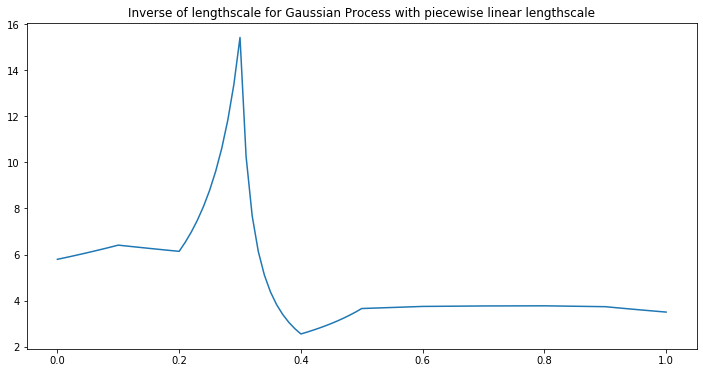

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


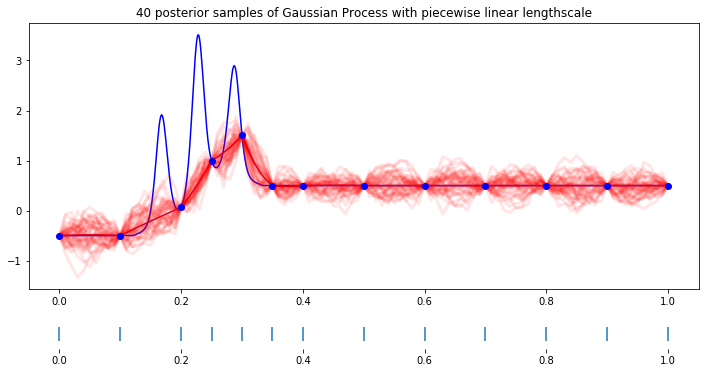

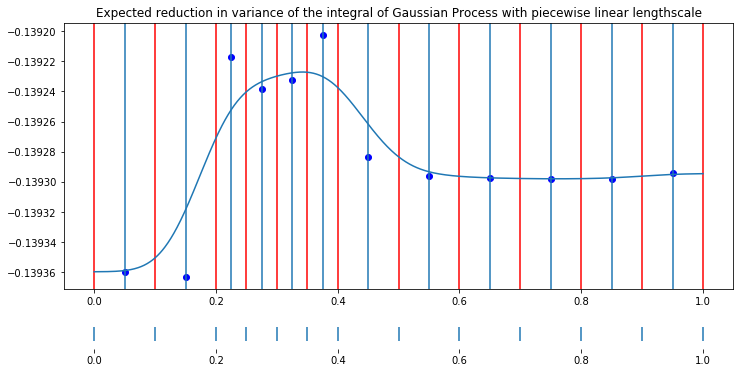

0.15000000000000002
0.006952107294903254
Step  4  of  31
beta:  [-0.4012999  -1.78452022 -1.94844086 -1.65809237 -2.7646606  -0.92646851
 -1.29348993 -1.31682026 -1.32273426 -1.32481998 -1.31443936 -1.24612378] 
Message:  Optimization terminated successfully. 
Value:  18.00672967714146 
Success:  True 
Log-Likelihood:  -6.093049440331226


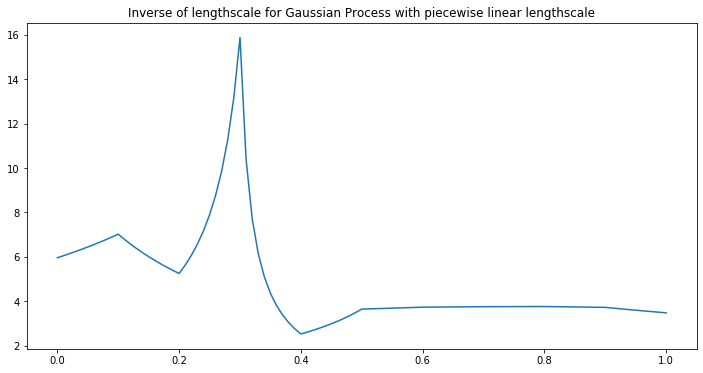

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


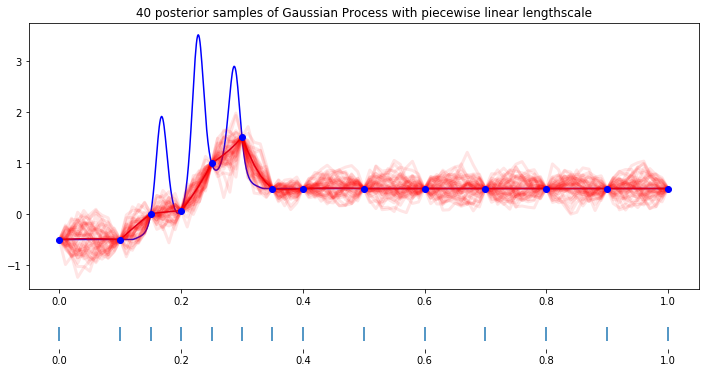

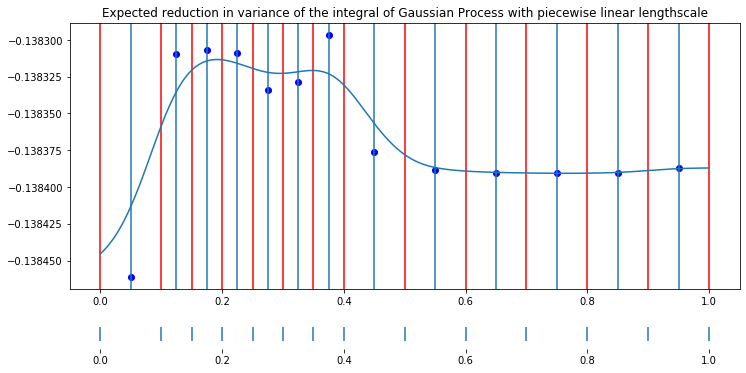

0.05
-0.4999993244532658
Step  5  of  31
beta:  [-0.42347789 -1.54759156 -1.79445763 -1.65850361 -2.78189118 -0.92862777
 -1.29404466 -1.31564508 -1.32145559 -1.32366128 -1.31326535 -1.24404442] 
Message:  Optimization terminated successfully. 
Value:  17.546431763294507 
Success:  True 
Log-Likelihood:  -5.645711230352363


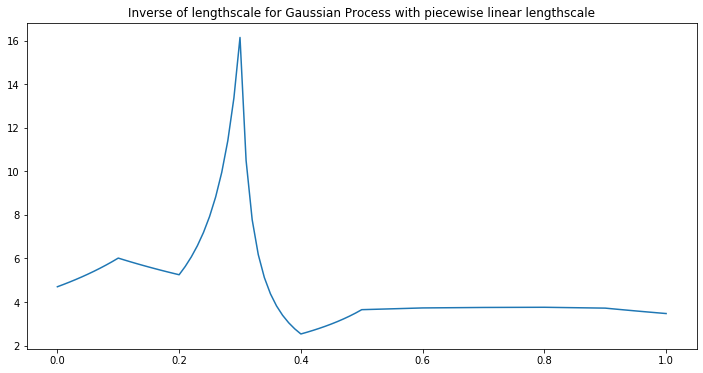

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


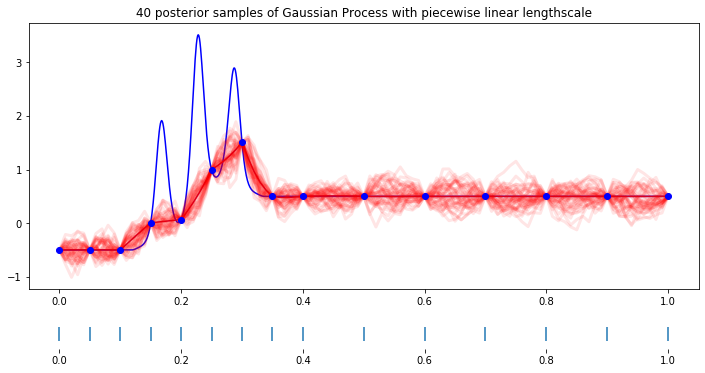

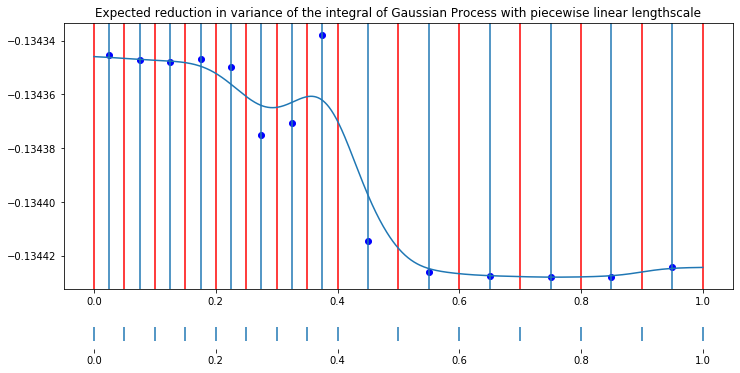

0.75
0.5
Step  6  of  31
beta:  [-0.4642357  -1.59068247 -1.83991882 -1.68818203 -2.80755563 -0.9122697
 -1.28644934 -1.28059803 -1.16036333 -1.16242591 -1.27197157 -1.22101192] 
Message:  Optimization terminated successfully. 
Value:  16.79474424677528 
Success:  True 
Log-Likelihood:  -4.6534216066476315


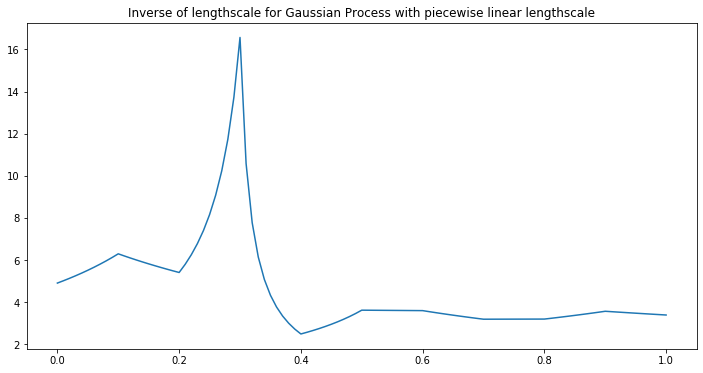

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


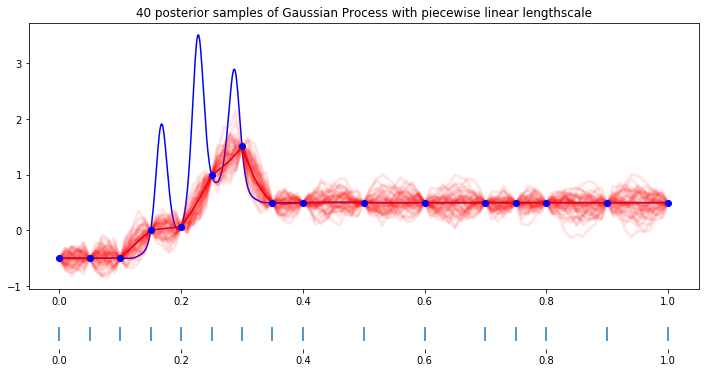

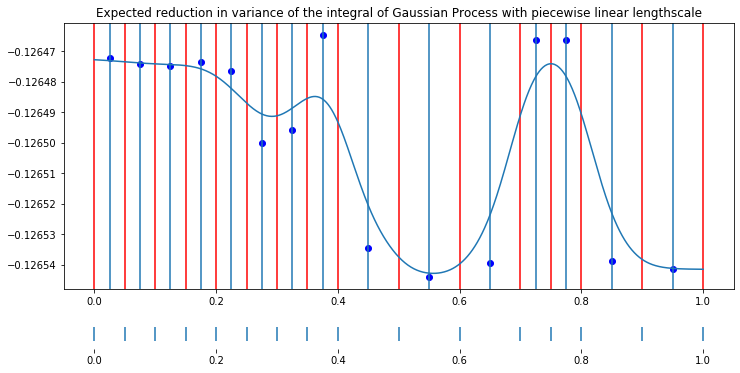

0.55
0.49999999999371125
Step  7  of  31
beta:  [-0.50240043 -1.63447779 -1.88333334 -1.71724027 -2.82811759 -0.88063649
 -1.08406691 -1.11523051 -1.12700505 -1.15253288 -1.26627902 -1.21304916] 
Message:  Optimization terminated successfully. 
Value:  15.977924195429452 
Success:  True 
Log-Likelihood:  -3.539616994612567


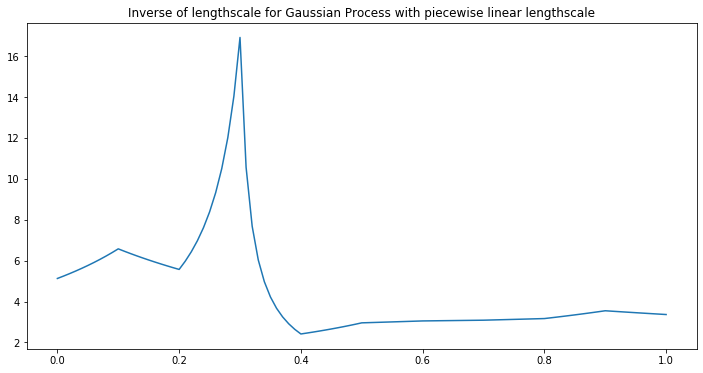

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


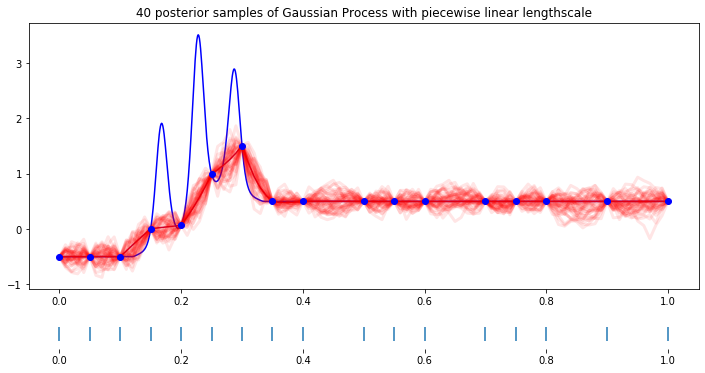

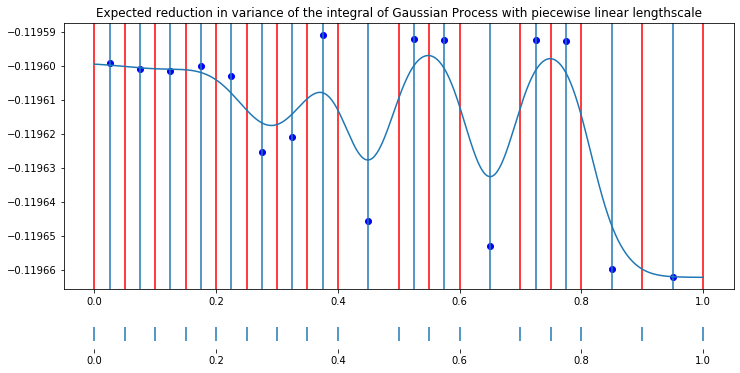

0.95
0.5
Step  8  of  31
beta:  [-0.53934131 -1.67875288 -1.92557224 -1.74675356 -2.84654092 -0.86569287
 -1.07957513 -1.11081007 -1.11378731 -1.10733595 -1.07485735 -0.96302791] 
Message:  Optimization terminated successfully. 
Value:  15.092287797718459 
Success:  True 
Log-Likelihood:  -2.3673090158566623


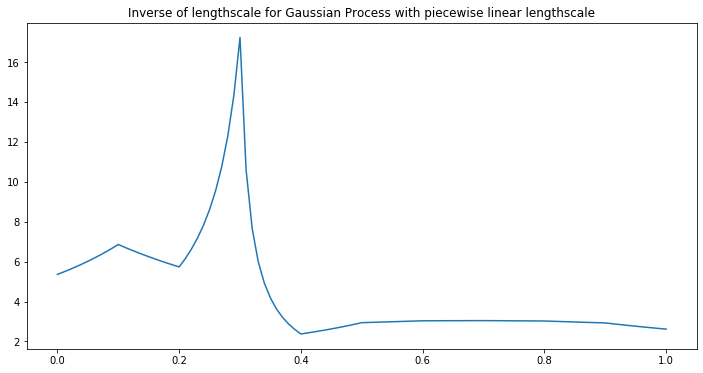

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


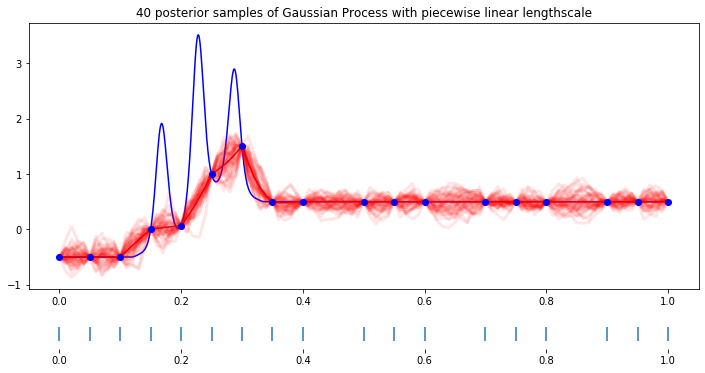

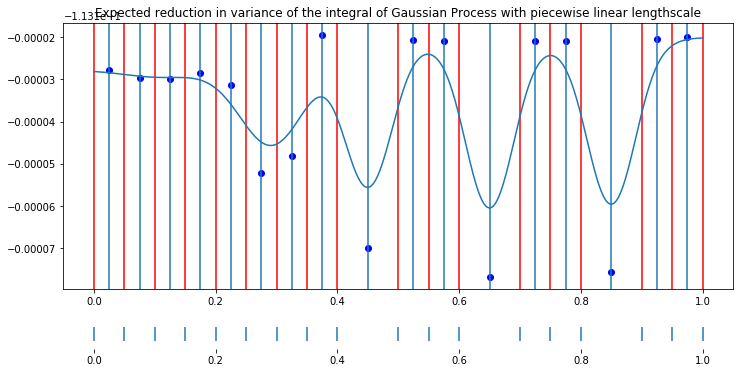

0.6499999999999999
0.4999999999999978
Step  9  of  31
beta:  [-0.57292399 -1.71892879 -1.96289132 -1.77740152 -2.86255779 -0.8447079
 -1.03971628 -0.96820502 -0.97537495 -1.06897961 -1.06262484 -0.95321433] 
Message:  Optimization terminated successfully. 
Value:  14.129220060215873 
Success:  True 
Log-Likelihood:  -1.0724235275172642


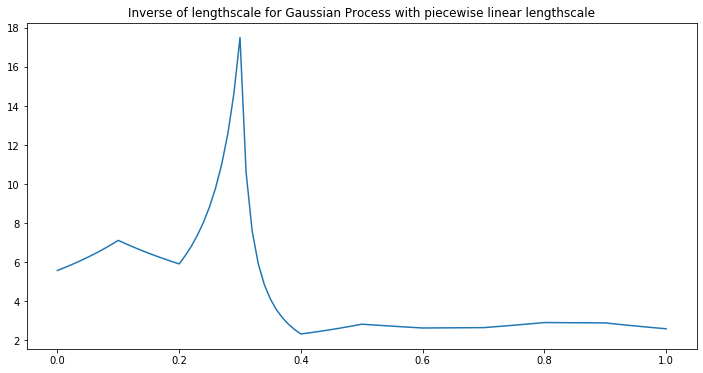

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


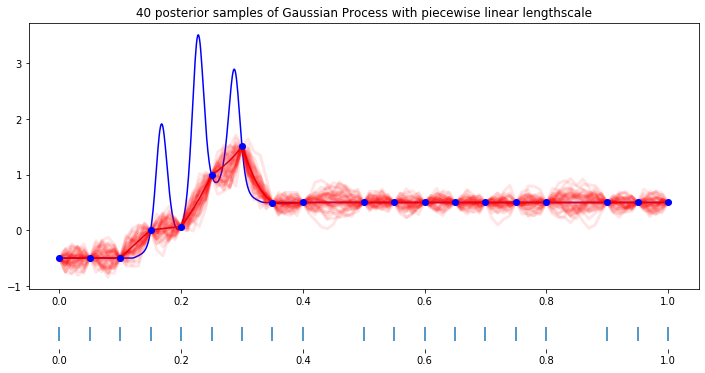

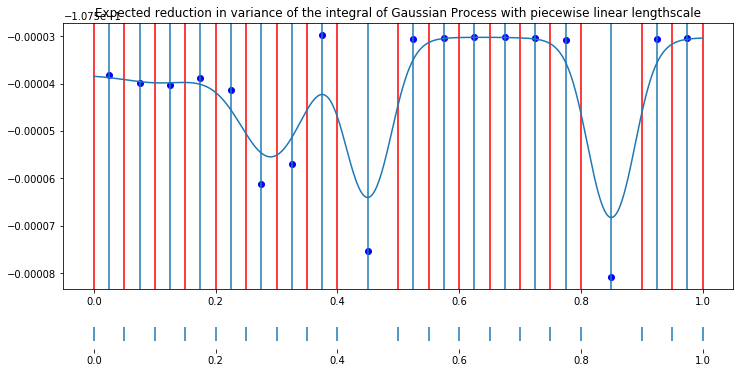

0.8500000000000001
0.5
Step  10  of  31
beta:  [-0.60492636 -1.75843442 -1.99822643 -1.80927747 -2.87664208 -0.83060158
 -1.03398185 -0.95691976 -0.93823073 -0.93034414 -0.91918872 -0.88620033] 
Message:  Optimization terminated successfully. 
Value:  13.110093909952177 
Success:  True 
Log-Likelihood:  0.3045120856538155


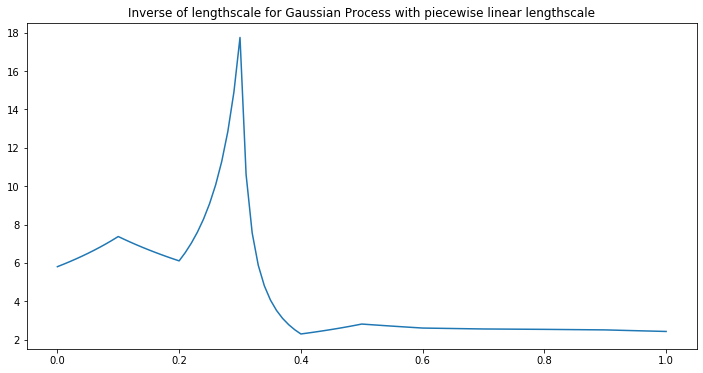

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


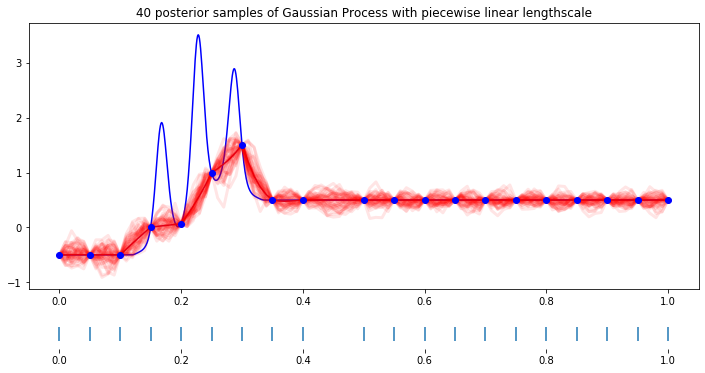

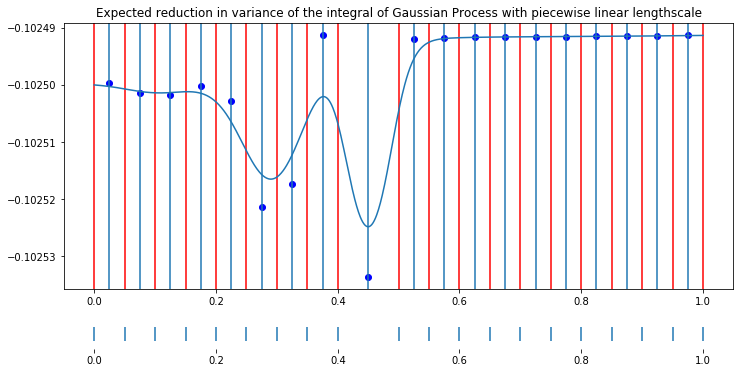

0.45
0.49999998125347034
Step  11  of  31
beta:  [-0.6371703  -1.80169375 -2.03284505 -1.84232076 -2.87081034 -0.71418806
 -0.87747328 -0.91809808 -0.92604275 -0.92486901 -0.91454108 -0.8780339 ] 
Message:  Optimization terminated successfully. 
Value:  11.994623085164362 
Success:  True 
Log-Likelihood:  1.755573204664385


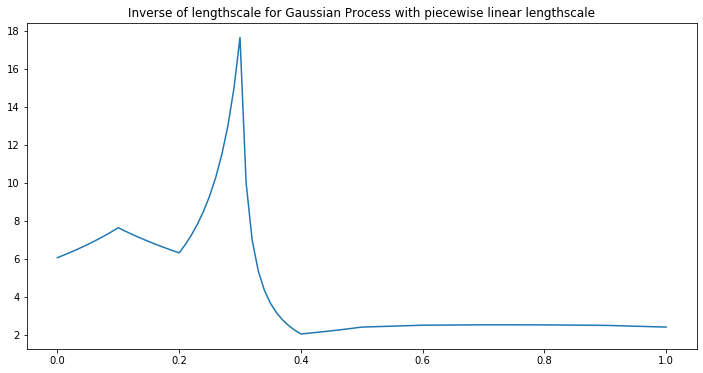

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


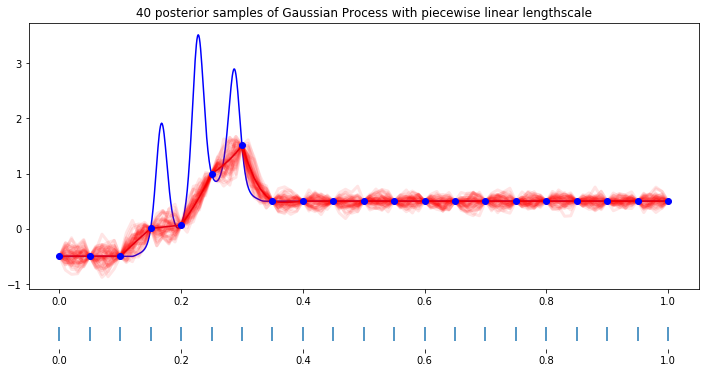

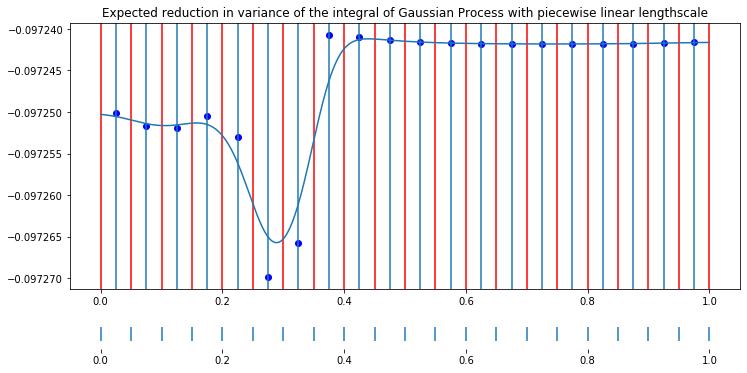

0.275
1.7057217947191923
Step  12  of  31
beta:  [-0.54012942 -1.72475827 -1.95458567 -1.80979682 -3.01812232 -0.70370987
 -0.87517091 -0.91824873 -0.92745123 -0.92732199 -0.91886366 -0.88767541] 
Message:  Optimization terminated successfully. 
Value:  14.005253970895339 
Success:  True 
Log-Likelihood:  -0.23125371826677465


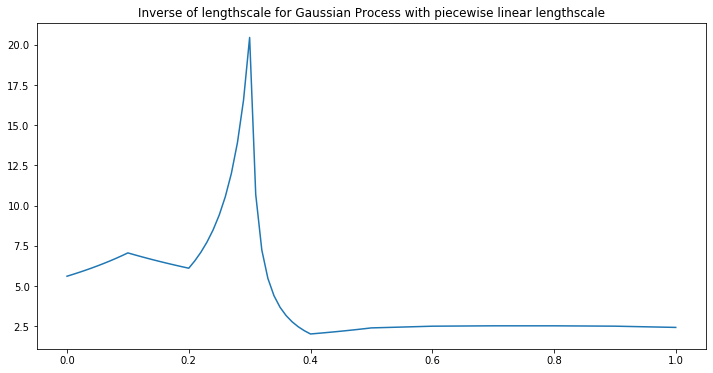

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


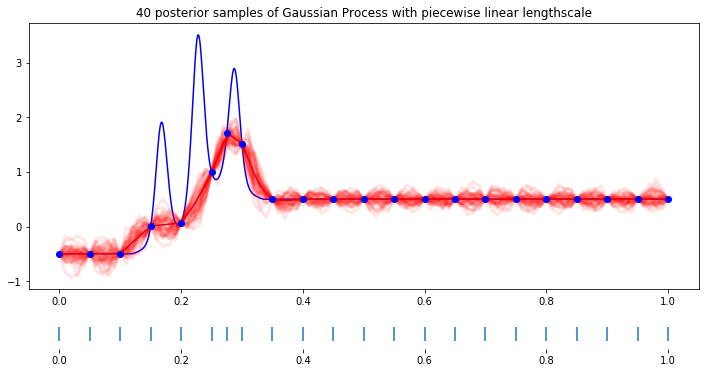

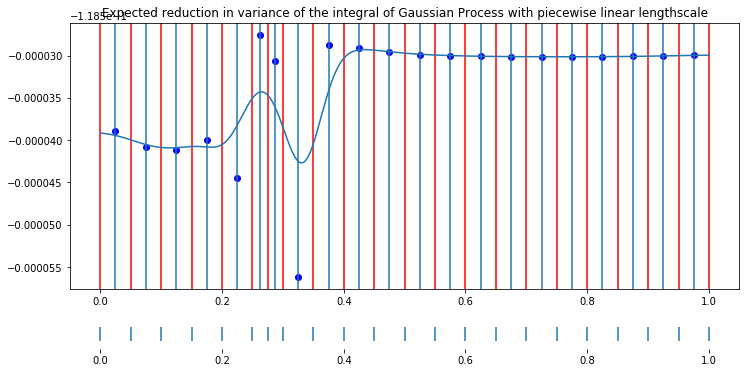

0.32499999999999996
0.5459693062929211
Step  13  of  31
beta:  [-0.55666373 -1.78960754 -1.98075922 -2.07082876 -3.02436332 -0.41122069
 -0.81336659 -0.90151902 -0.92199521 -0.92587714 -0.91924126 -0.88944108] 
Message:  Optimization terminated successfully. 
Value:  14.180270855660977 
Success:  True 
Log-Likelihood:  0.22901431598117483


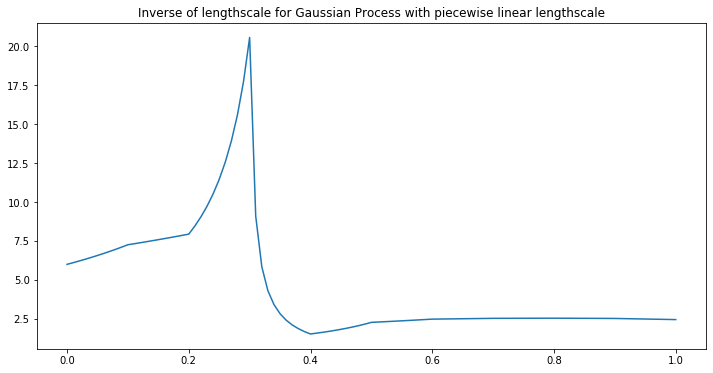

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


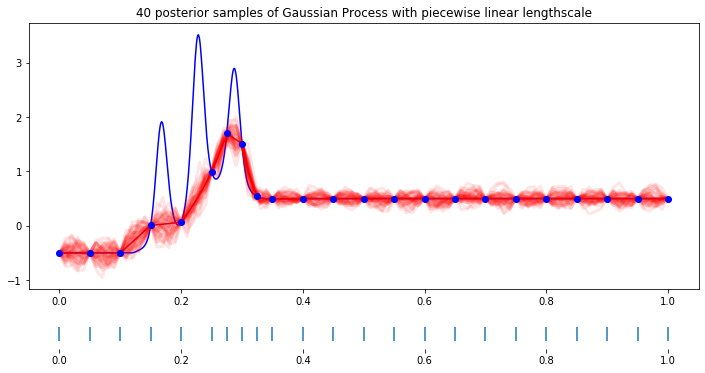

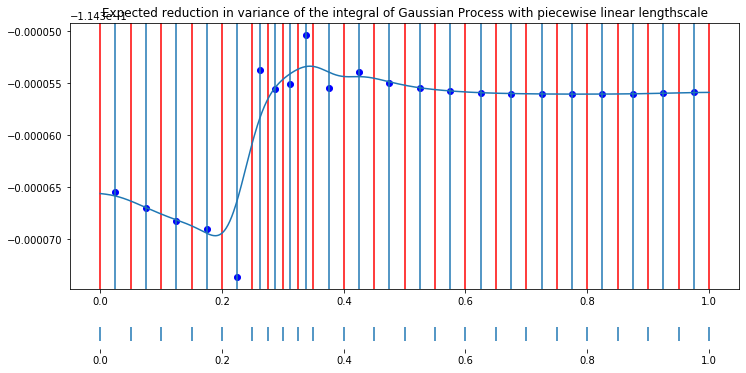

0.225
3.3332729063269175
Step  14  of  31
beta:  [ 0.0716254  -0.81943489 -0.74798354 -4.77073382 -2.47040204 -0.81342574
 -0.90606074 -0.92872584 -0.93372315 -0.93396214 -0.92996278 -0.91404527] 
Message:  Optimization terminated successfully. 
Value:  31.137099470869504 
Success:  True 
Log-Likelihood:  -14.836384099841073


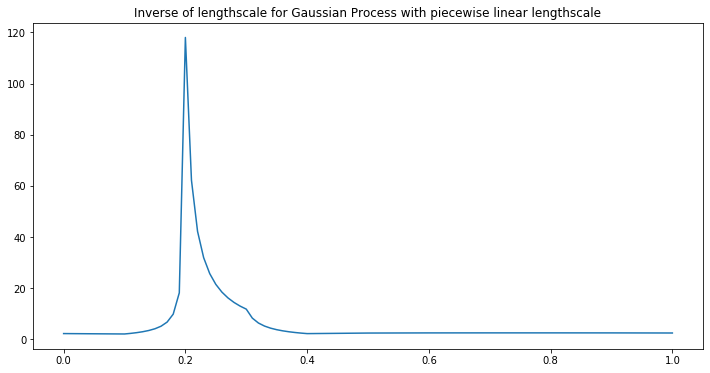

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


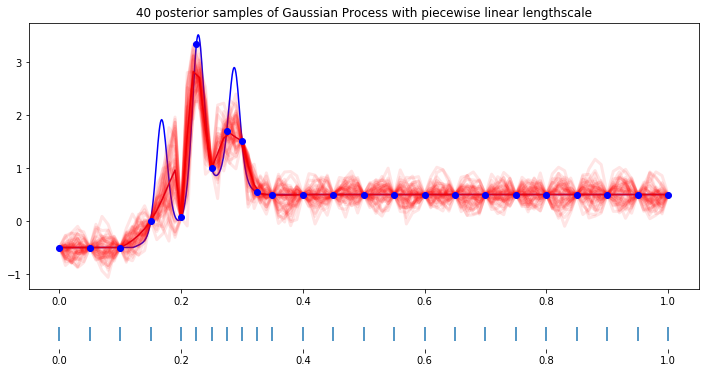

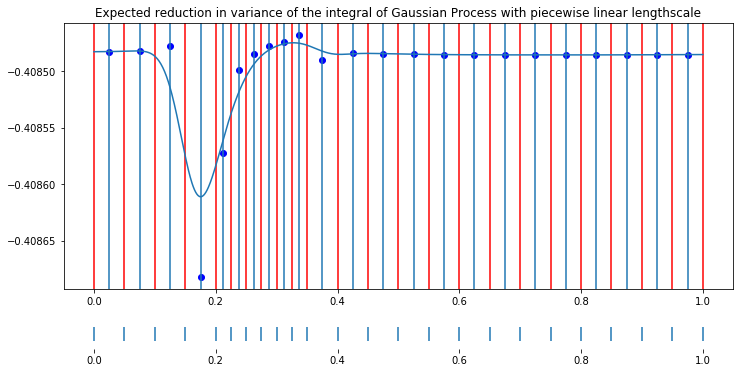

0.17500000000000002
1.386400133362467
Step  15  of  31
beta:  [ 0.13035988 -0.83028714 -0.76492301 -4.98997893 -2.23943371 -0.81746822
 -0.90643472 -0.92767634 -0.93243997 -0.93282246 -0.92882861 -0.91222985] 
Message:  Optimization terminated successfully. 
Value:  32.71817164349253 
Success:  True 
Log-Likelihood:  -16.63123549678092


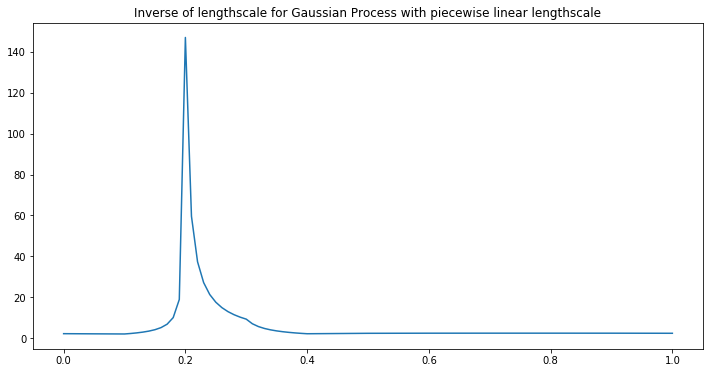

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


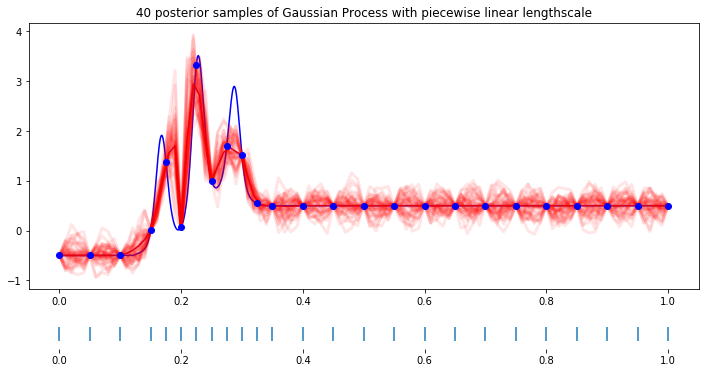

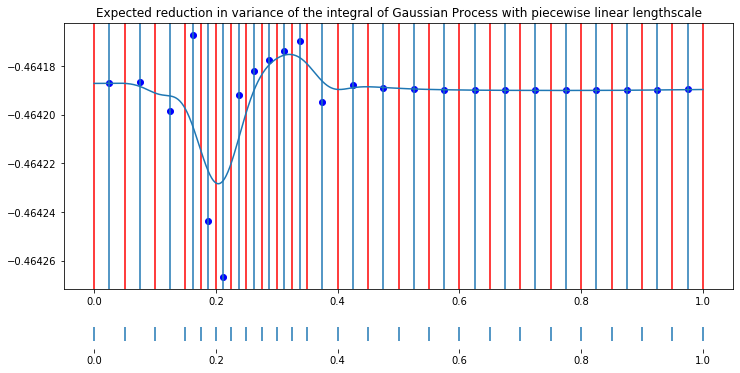

0.21250000000000002
1.0254358697821884
Step  16  of  31
beta:  [ 0.11645779 -0.84080827 -0.78158006 -4.89435019 -2.51717527 -0.85447724
 -0.91702861 -0.93113061 -0.93402742 -0.93381839 -0.92975476 -0.91377372] 
Message:  Optimization terminated successfully. 
Value:  34.300762587558665 
Success:  True 
Log-Likelihood:  -17.83809852433764


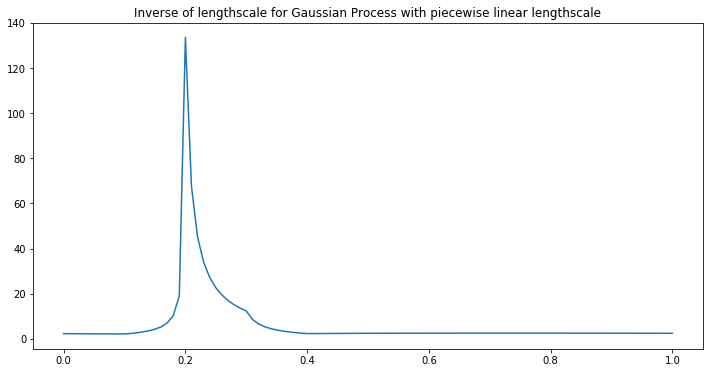

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


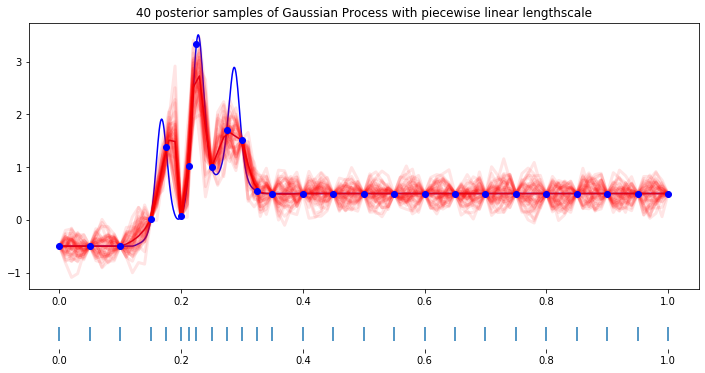

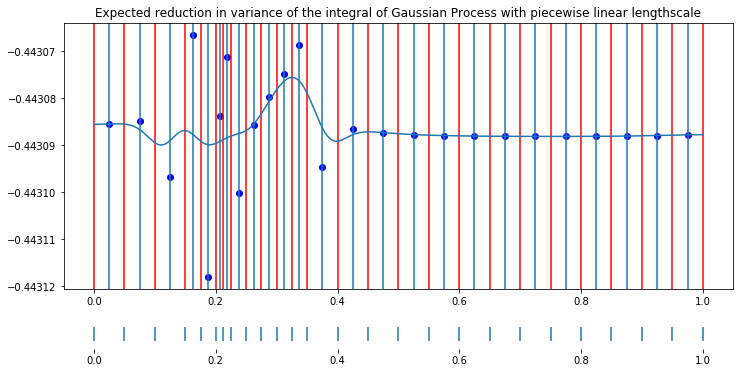

0.1875
0.18048425301733773
Step  17  of  31
beta:  [ 0.15021341 -1.30944161 -1.65307609 -4.7003909  -2.53872921 -0.79689568
 -0.90211997 -0.93004278 -0.93756448 -0.93920219 -0.93769101 -0.93024631] 
Message:  Optimization terminated successfully. 
Value:  36.93031024783555 
Success:  True 
Log-Likelihood:  -20.645495698090855


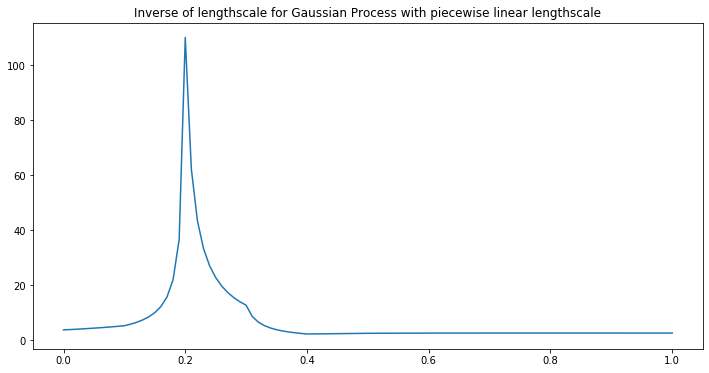

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


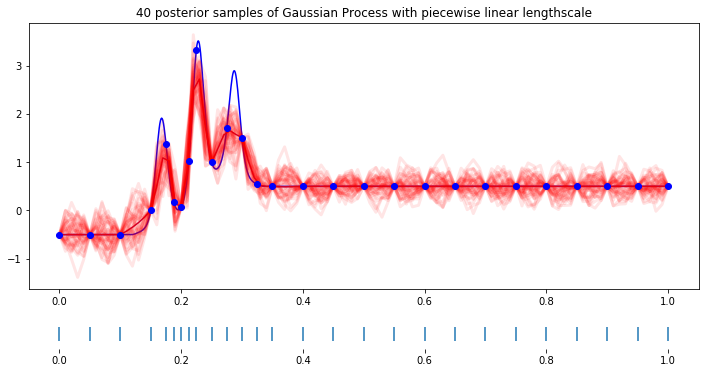

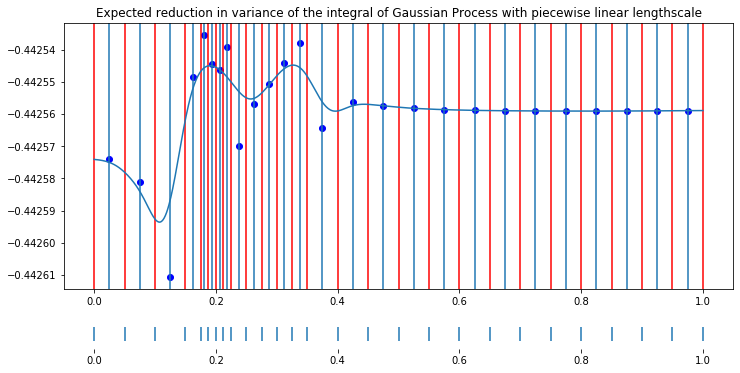

0.125
-0.48108548709485077
Step  18  of  31
beta:  [ 0.14392042 -1.26646265 -1.52415041 -4.75143555 -2.53853064 -0.79930166
 -0.90286253 -0.93037339 -0.93776083 -0.93936956 -0.93793069 -0.9308076 ] 
Message:  Optimization terminated successfully. 
Value:  36.90305309217172 
Success:  True 
Log-Likelihood:  -20.637818484824855


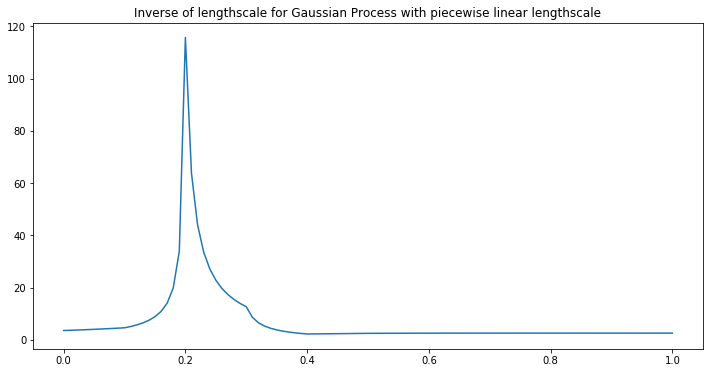

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


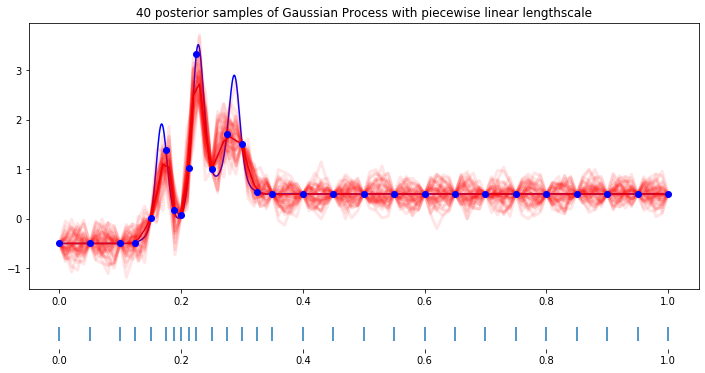

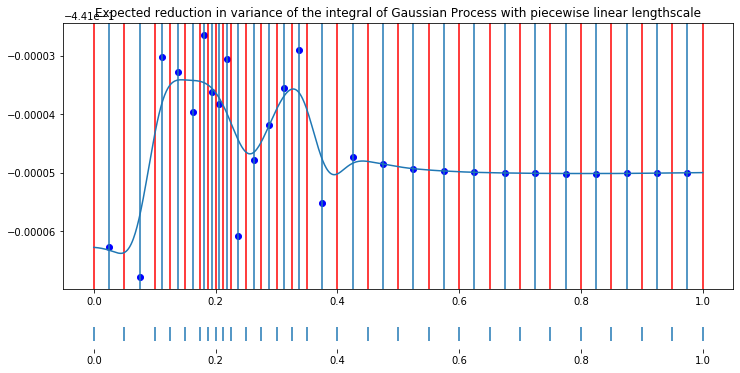

0.07500000000000001
-0.4999950083688277
Step  19  of  31
beta:  [ 0.13233981 -1.11599325 -1.41437091 -4.79695821 -2.55034439 -0.80642274
 -0.90476195 -0.9307746  -0.93770281 -0.93915898 -0.93761128 -0.93017353] 
Message:  Optimization terminated successfully. 
Value:  36.46608574360675 
Success:  True 
Log-Likelihood:  -20.145397509070527


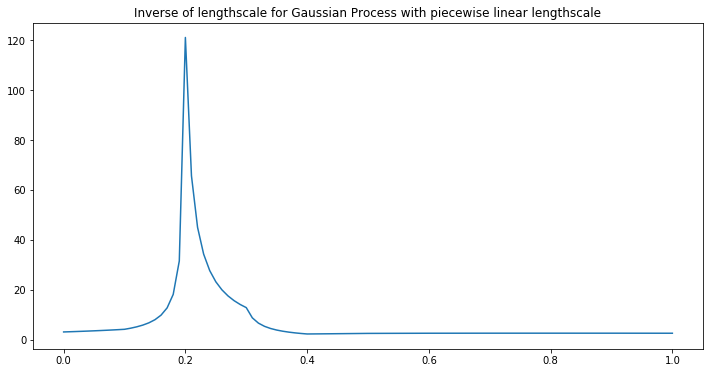

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


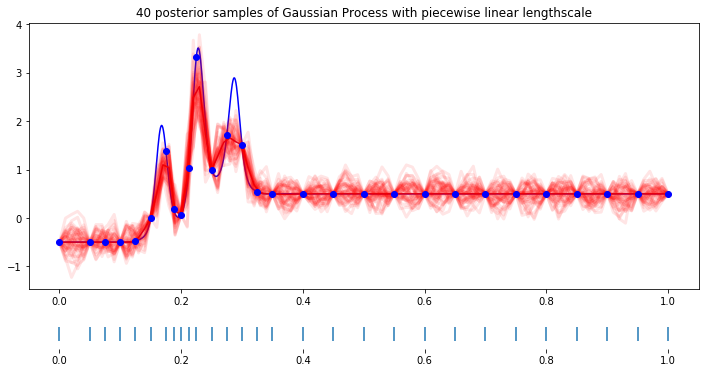

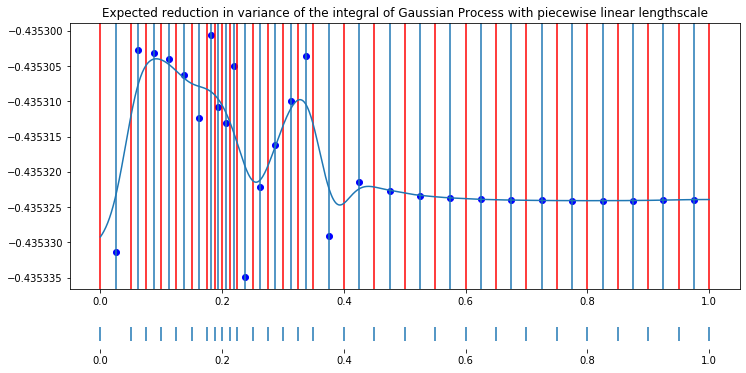

0.2375
2.356732425095457
Step  20  of  31
beta:  [ 0.13723122 -1.11687258 -1.41777873 -4.73034153 -2.51416927 -0.80424523
 -0.90412984 -0.93054477 -0.93757768 -0.93906593 -0.93750397 -0.92995627] 
Message:  Optimization terminated successfully. 
Value:  37.04095471404449 
Success:  True 
Log-Likelihood:  -20.881611162278364


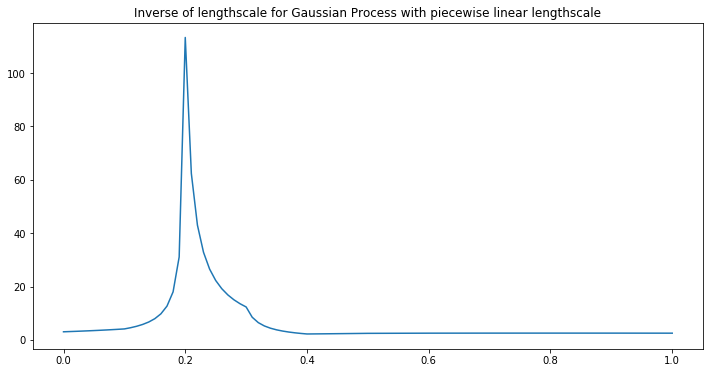

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


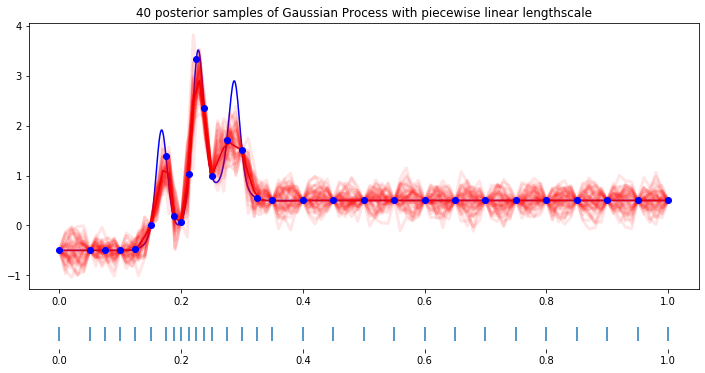

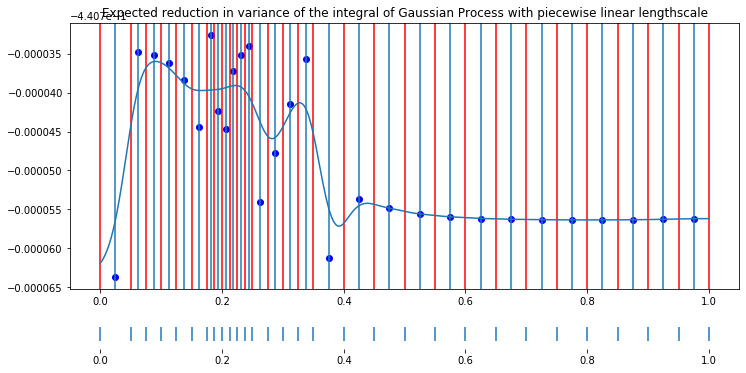

0.025
-0.49999990857463794
Step  21  of  31
beta:  [ 0.12255665 -0.8420164  -1.3681679  -4.76152942 -2.53019262 -0.8100195
 -0.90551469 -0.93064068 -0.93724697 -0.93856547 -0.93678676 -0.92850432] 
Message:  Optimization terminated successfully. 
Value:  36.43450220603911 
Success:  True 
Log-Likelihood:  -20.119340548965024


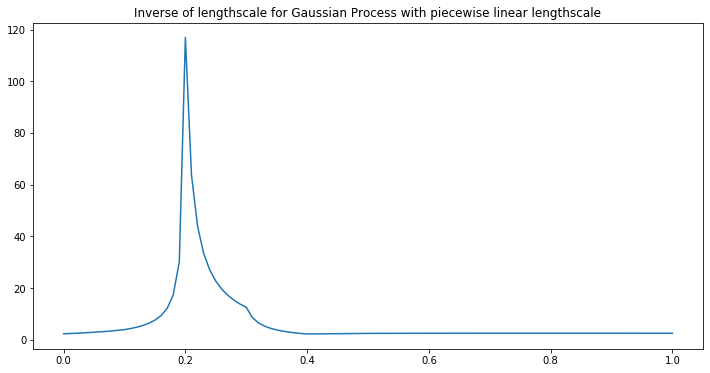

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


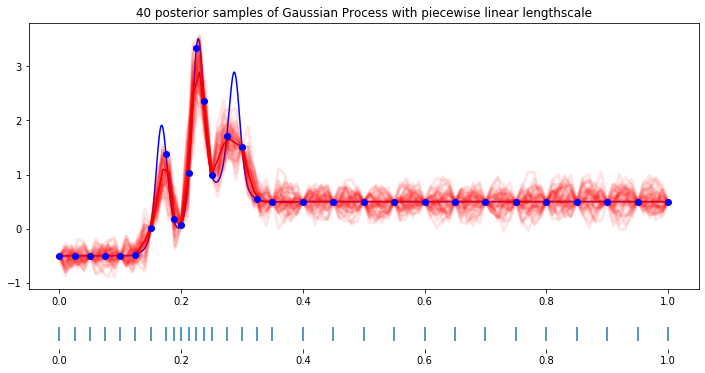

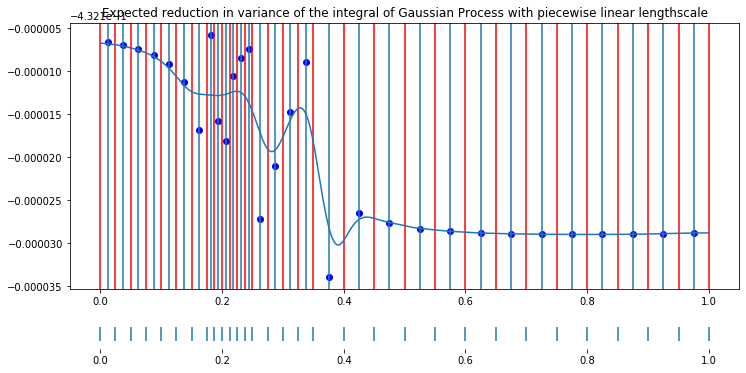

0.375
0.4999924371672919
Step  22  of  31
beta:  [ 0.09706486 -0.86767132 -1.4114374  -4.8029943  -2.53593427 -0.60959114
 -0.85343347 -0.9150887  -0.93130683 -0.93578359 -0.93492243 -0.92574908] 
Message:  Optimization terminated successfully. 
Value:  35.78637721904356 
Success:  True 
Log-Likelihood:  -19.100969261812864


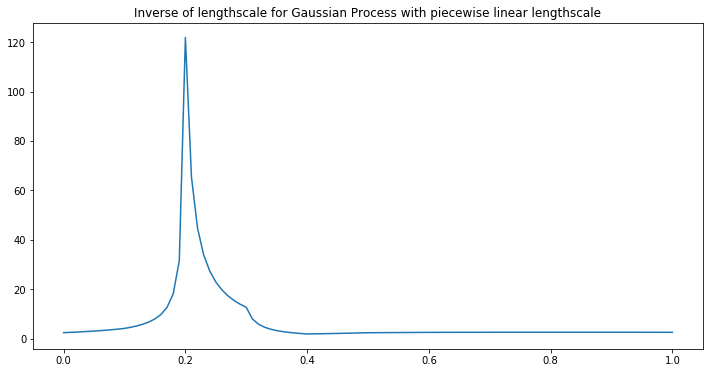

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


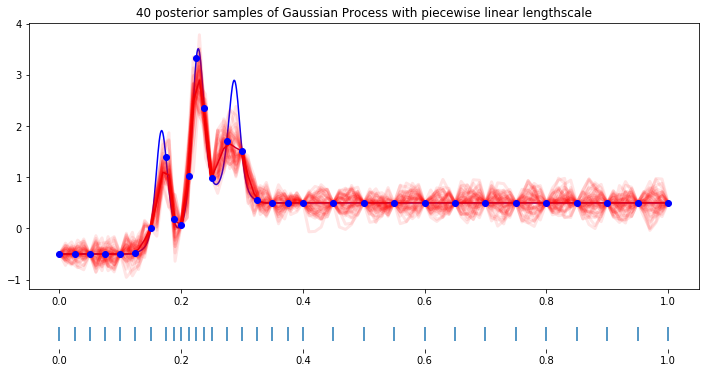

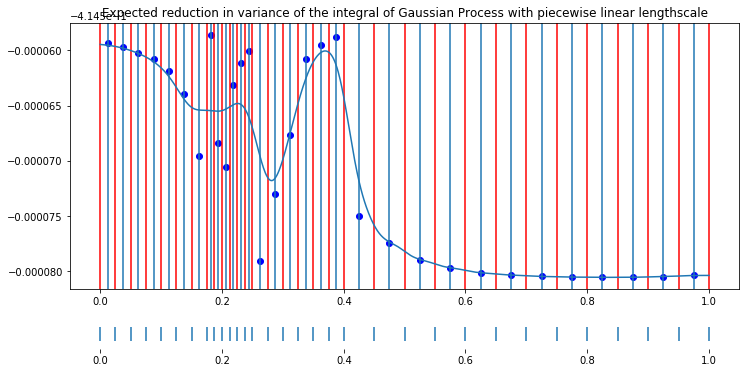

0.8250000000000001
0.5
Step  23  of  31
beta:  [ 0.07442242 -0.88284391 -1.44142925 -4.82567372 -2.55770013 -0.59834737
 -0.84754986 -0.90191826 -0.885889   -0.77993703 -0.83841495 -0.87297833] 
Message:  Optimization terminated successfully. 
Value:  35.031150463132384 
Success:  True 
Log-Likelihood:  -17.90075064178478


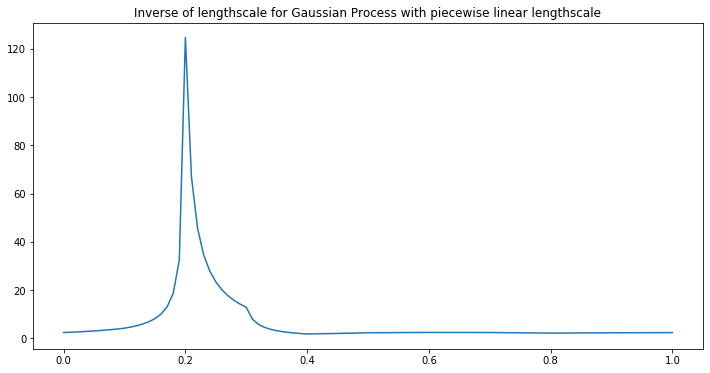

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


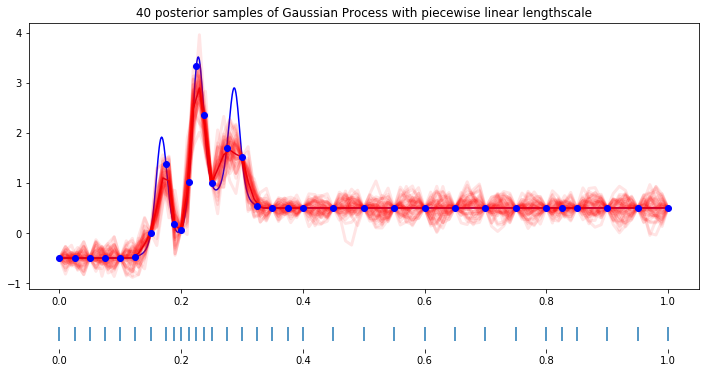

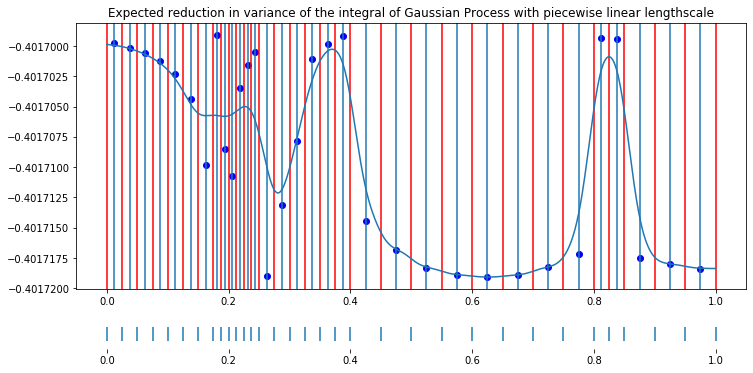

0.625
0.49999999999998446
Step  24  of  31
beta:  [ 0.05252547 -0.89892617 -1.47149148 -4.84749987 -2.57781889 -0.57736767
 -0.80000994 -0.74217796 -0.79622631 -0.75561845 -0.8300514  -0.86689744] 
Message:  Optimization terminated successfully. 
Value:  34.2343810789031 
Success:  True 
Log-Likelihood:  -16.629688069529866


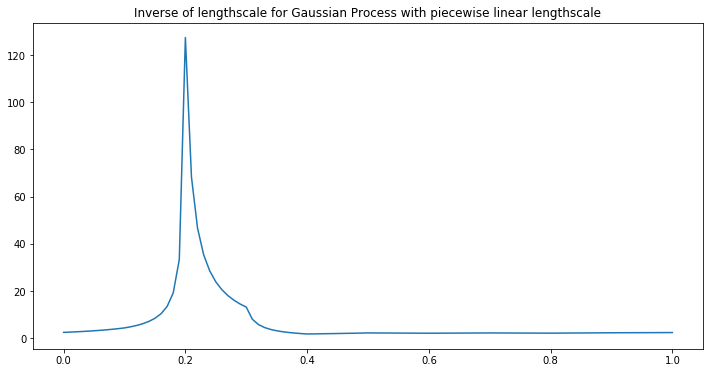

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


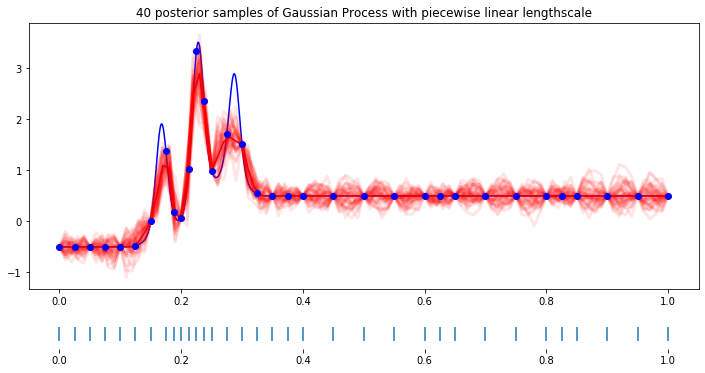

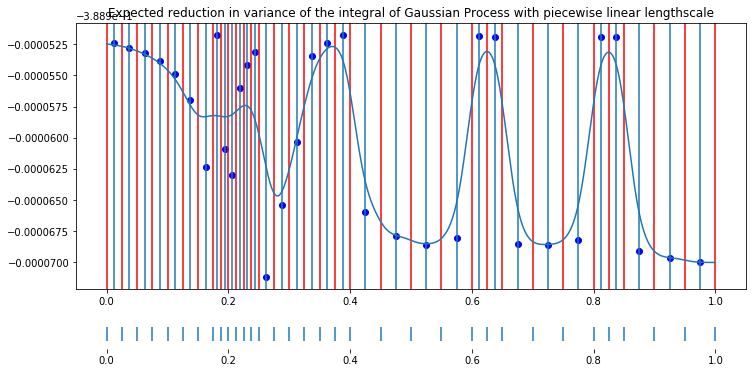

0.2625
0.9147402591226821
Step  25  of  31
beta:  [ 0.05130439 -0.90148207 -1.48270836 -4.81465087 -2.62222706 -0.57905103
 -0.80051897 -0.74236972 -0.7963477  -0.75572608 -0.83024996 -0.86736533] 
Message:  Optimization terminated successfully. 
Value:  34.79645147104427 
Success:  True 
Log-Likelihood:  -17.141735024979447


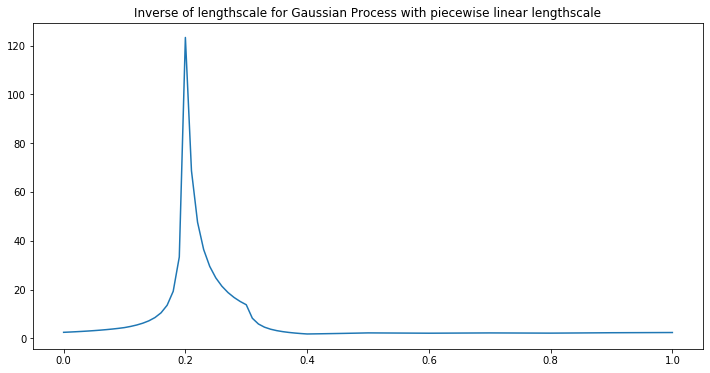

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


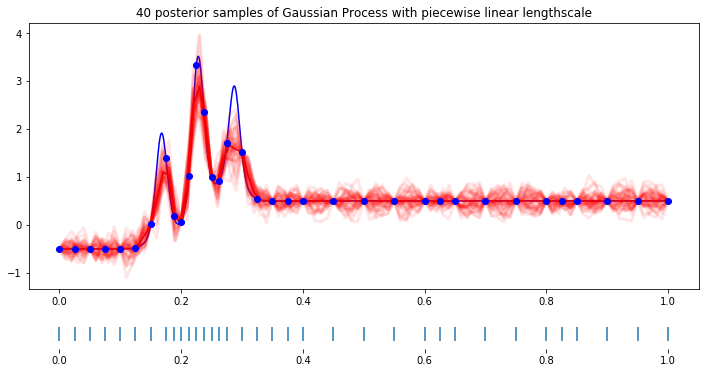

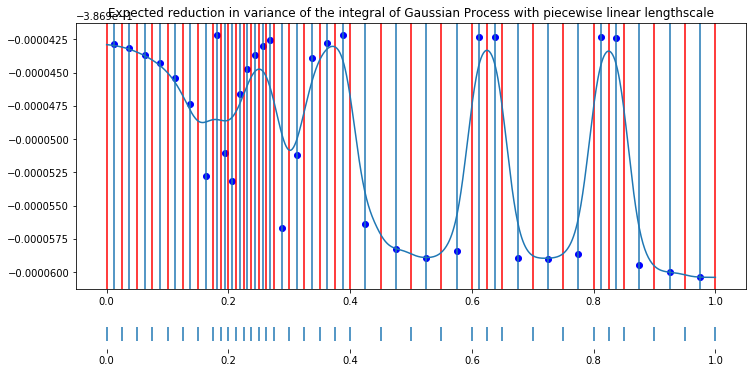

0.975
0.5
Step  26  of  31
beta:  [ 0.03057289 -0.9166402  -1.51135326 -4.83326025 -2.64281343 -0.56692231
 -0.79670973 -0.73699698 -0.78486509 -0.71889825 -0.70878598 -0.61045959] 
Message:  Optimization terminated successfully. 
Value:  33.93583179398962 
Success:  True 
Log-Likelihood:  -15.810779949294488


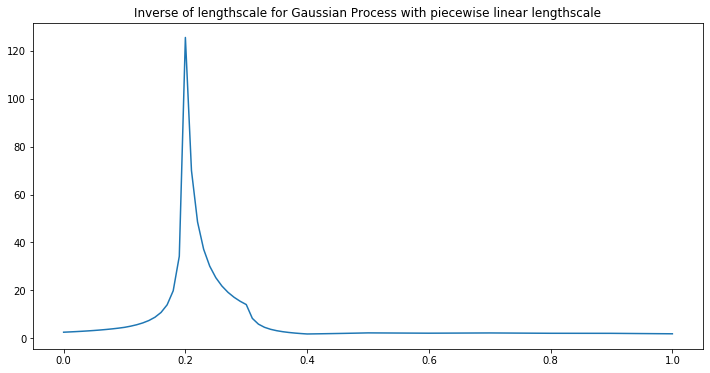

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


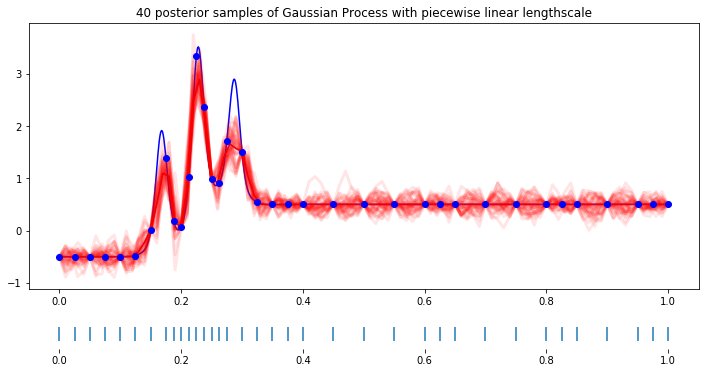

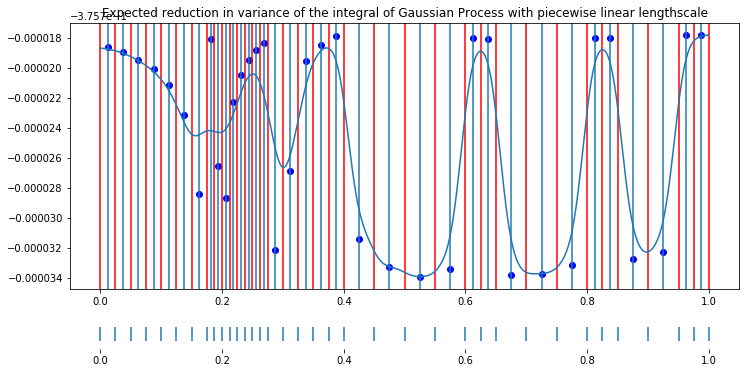

0.525
0.49999999995353206
Step  27  of  31
beta:  [ 0.00996895 -0.93511649 -1.54172435 -4.85237976 -2.66155536 -0.51895443
 -0.63403925 -0.65641295 -0.76161706 -0.71174364 -0.70582959 -0.60717563] 
Message:  Optimization terminated successfully. 
Value:  33.03768594438421 
Success:  True 
Log-Likelihood:  -14.40800713446895


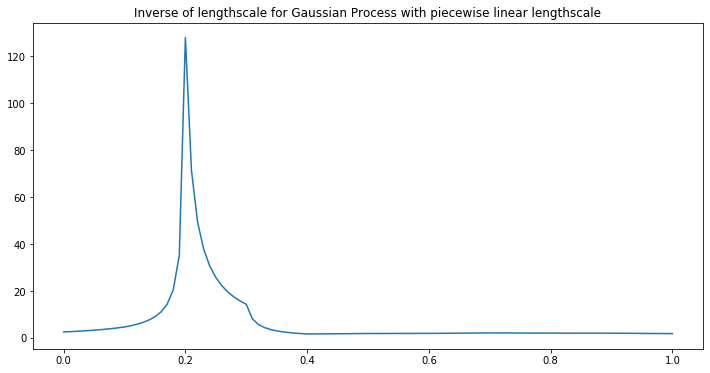

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


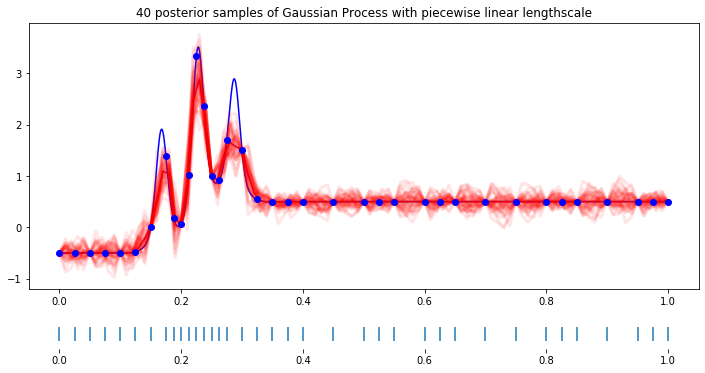

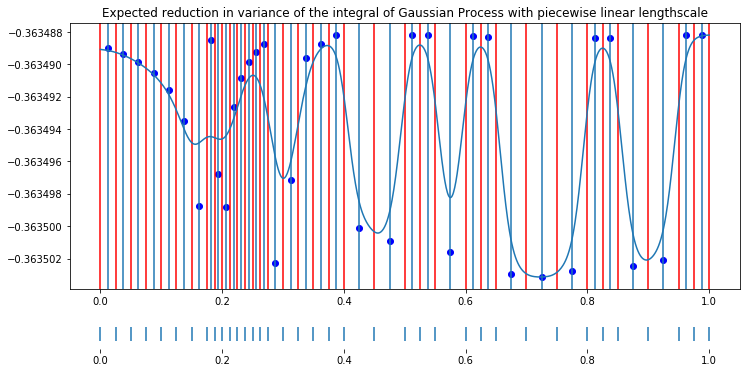

0.725
0.5
Step  28  of  31
beta:  [-0.00922407 -0.9510059  -1.5688805  -4.86889374 -2.67990447 -0.5065914
 -0.62017309 -0.61687711 -0.62058892 -0.63429242 -0.68011944 -0.59311786] 
Message:  Optimization terminated successfully. 
Value:  32.10793583924763 
Success:  True 
Log-Likelihood:  -12.972165833403398


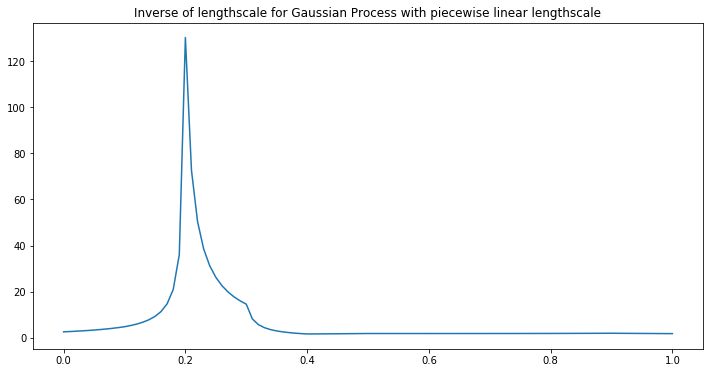

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


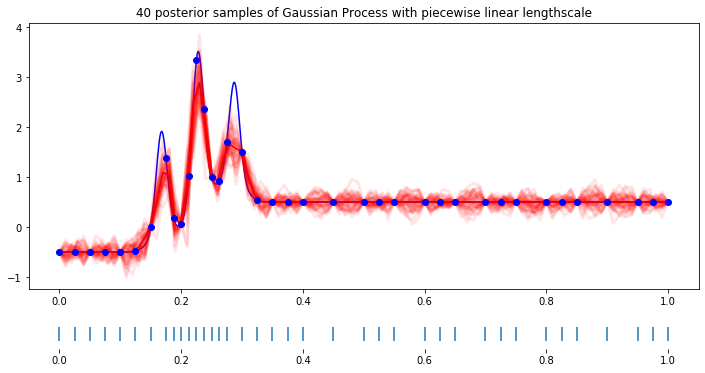

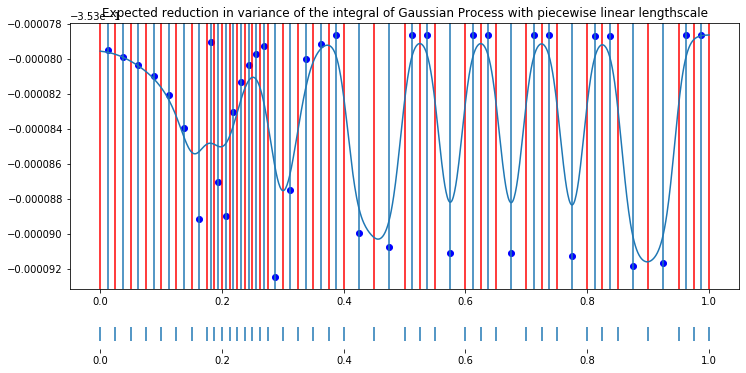

0.2875
2.895163764523975
Step  29  of  31
beta:  [ 0.10962342 -0.85610659 -1.38557966 -4.22506107 -3.30526188 -0.54406231
 -0.63104015 -0.62025752 -0.62187352 -0.63496319 -0.68067948 -0.59429395] 
Message:  Optimization terminated successfully. 
Value:  37.74610355529771 
Success:  True 
Log-Likelihood:  -18.39868527258007


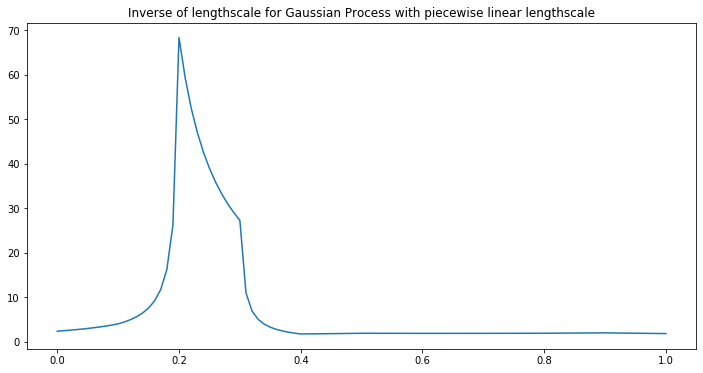

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


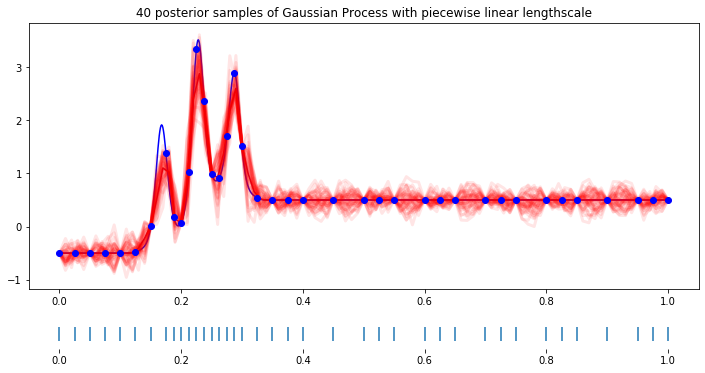

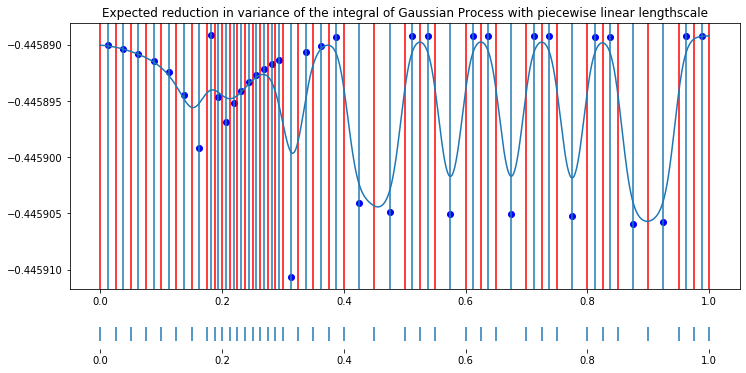

0.3125
0.6840101394679062
Step  30  of  31
beta:  [ 0.10484724 -0.85299826 -1.3683954  -4.25882806 -3.27161364 -0.52581402
 -0.62586584 -0.61858825 -0.62123294 -0.63465834 -0.68047256 -0.59389295] 
Message:  Optimization terminated successfully. 
Value:  37.82851591611174 
Success:  True 
Log-Likelihood:  -18.460753761755818


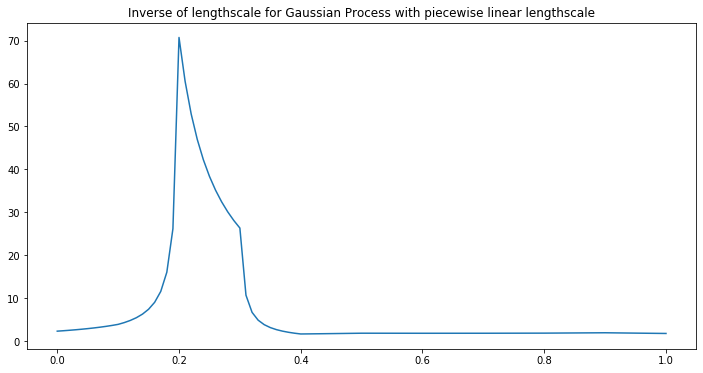

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


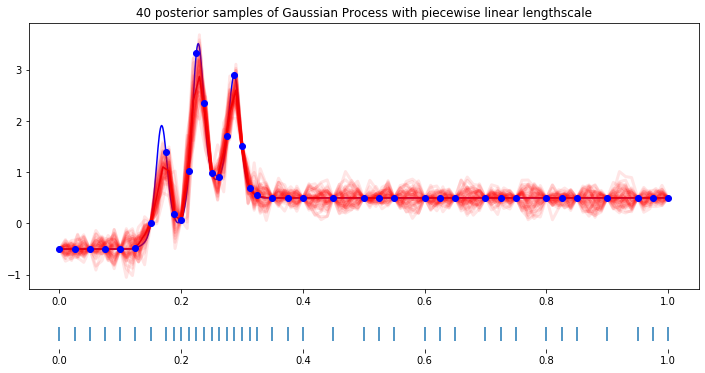

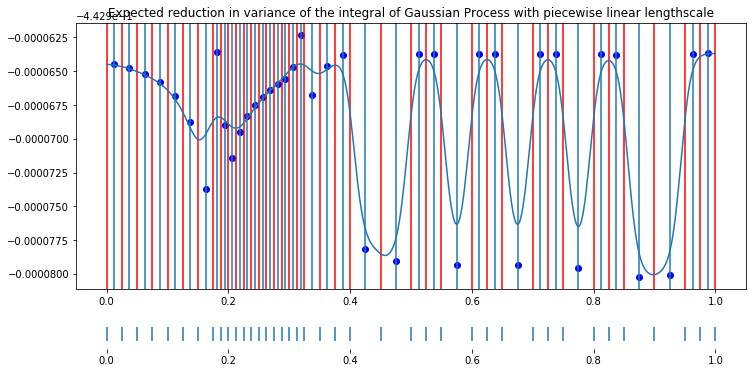

0.875
0.5
Step  31  of  31
beta:  [ 0.08799905 -0.8641805  -1.38878209 -4.27267536 -3.28802807 -0.51962666
 -0.62225134 -0.61085449 -0.59768193 -0.55968137 -0.54296894 -0.52223888] 
Message:  Optimization terminated successfully. 
Value:  36.955789960000146 
Success:  True 
Log-Likelihood:  -17.096467198287236


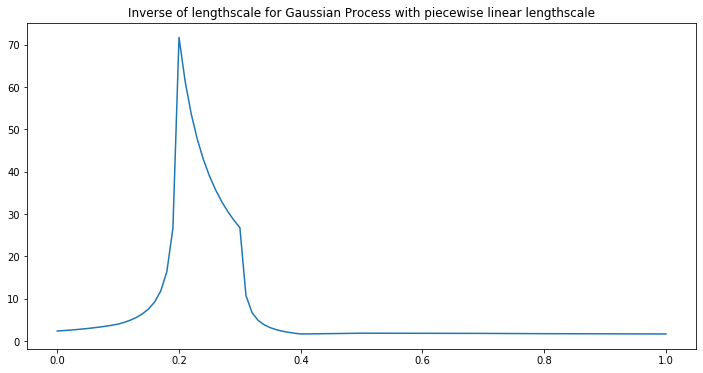

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


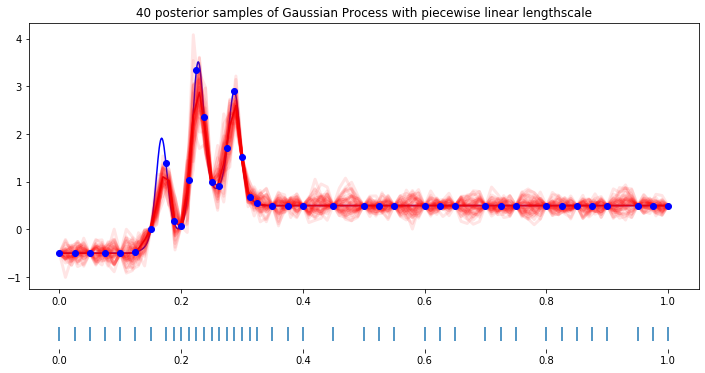

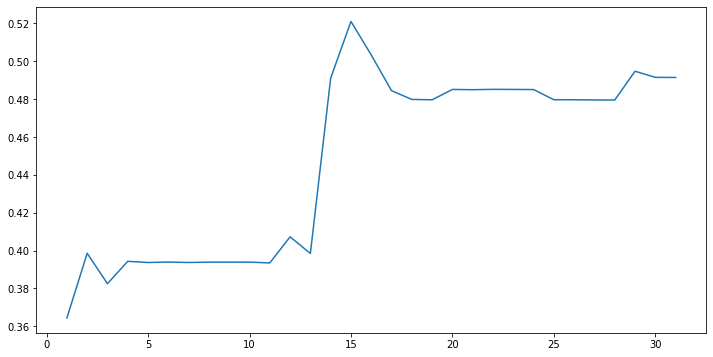

In [7]:
GPs_mat1,int_params_mat1 = abc.ABC(func,GP,mesh.get_points,30,[30,1],options={'plot':True,"save":True})

See if output is OK:

D:\Users\LocalABC\gp.py:116: RuntimeWarning: invalid value encountered in sqrt
  stdv = np.nan_to_num(np.sqrt(np.diag(K_mesh) - np.sum(L_solved ** 2, axis=0)))
D:\Program Files\Anaconda\envs\ABC2\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: overflow encountered in exp


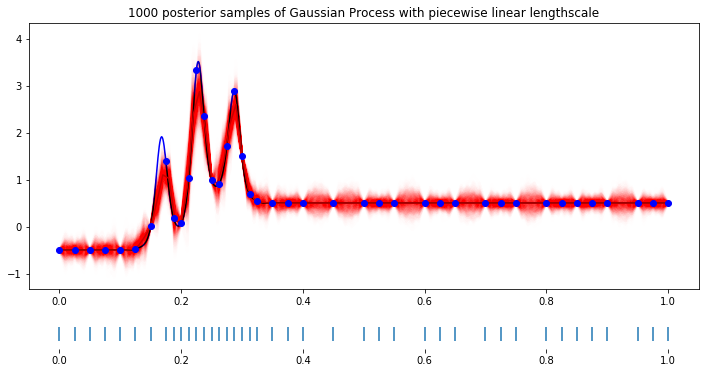

In [8]:
final_GP = GPs_mat1[-1]

plot.plt_samples_1D(func,final_GP,1000,5/1000) #5/1000 is transparency (alpha) of samples

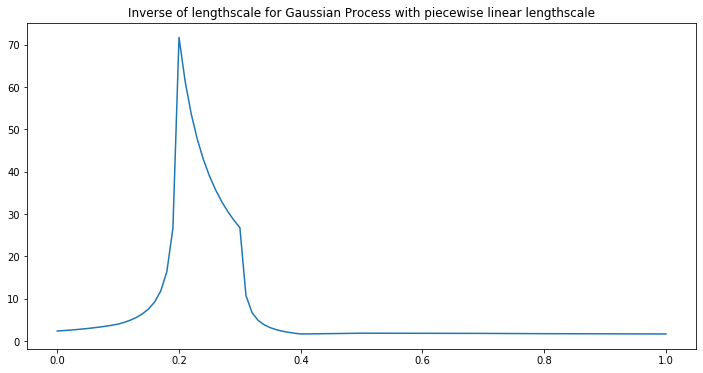

In [9]:
plot.plt_l_scale_1D(final_GP, True) # rec = True means we plot the reciprocal of the length scale.